<a href="https://colab.research.google.com/github/khuramgill/Ai-Labs/blob/main/Ai_Lab_6_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study 1:Employee Performance Prediction**

**Generate Dummy Data**

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Generate Dummy Data
np.random.seed(42)  # For reproducibility

n = 1500  # Number of rows
data = {
    'EmployeeID': np.arange(1, n + 1),
    'Age': np.random.randint(22, 61, size=n),
    'YearsOfExperience': np.random.randint(1, 41, size=n),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'PerformanceRating': np.random.randint(1, 6, size=n)  # Ratings between 1 (Low) and 5 (Excellent)
}

df = pd.DataFrame(data)


** Explore and Inspect the Data**

In [2]:
# Step 2: Explore and Inspect the Data
print("First 15 rows of the dataset:")
print(df.head(15))

print("\nChecking for missing values:")
print(df.isnull().sum())


First 15 rows of the dataset:
    EmployeeID  Age  YearsOfExperience  Gender  PerformanceRating
0            1   60                 16    Male                  5
1            2   50                 27  Female                  5
2            3   36                  8  Female                  2
3            4   29                 25  Female                  4
4            5   42                 17  Female                  1
5            6   60                 29    Male                  5
6            7   40                  8    Male                  5
7            8   44                 15    Male                  4
8            9   32                 27    Male                  2
9           10   32                  7    Male                  1
10          11   45                  3  Female                  2
11          12   57                 29    Male                  2
12          13   45                 24  Female                  1
13          14   24                  3    Male

**Handling Missing Data**

In [3]:
# Step 3: Handling Missing Data
# Let's introduce some missing data in 'YearsOfExperience' for demonstration
df.loc[np.random.randint(0, n, size=30), 'YearsOfExperience'] = np.nan
print("\nMissing values after introducing some:")
print(df.isnull().sum())

# Fill missing YearsOfExperience with the mean
df['YearsOfExperience'].fillna(df['YearsOfExperience'].mean(), inplace=True)
print("\nMissing values after filling:")
print(df.isnull().sum())



Missing values after introducing some:
EmployeeID            0
Age                   0
YearsOfExperience    29
Gender                0
PerformanceRating     0
dtype: int64

Missing values after filling:
EmployeeID           0
Age                  0
YearsOfExperience    0
Gender               0
PerformanceRating    0
dtype: int64


<ipython-input-3-3eb23038fd38>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsOfExperience'].fillna(df['YearsOfExperience'].mean(), inplace=True)


**Encoding Categorical Data**

In [4]:
# Step 4: Encoding Categorical Data
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
print("\nAfter encoding 'Gender' column:")
print(df.head())



After encoding 'Gender' column:
   EmployeeID  Age  YearsOfExperience  Gender  PerformanceRating
0           1   60               16.0       0                  5
1           2   50               27.0       1                  5
2           3   36                8.0       1                  2
3           4   29               25.0       1                  4
4           5   42               17.0       1                  1


**Outlier Detection**

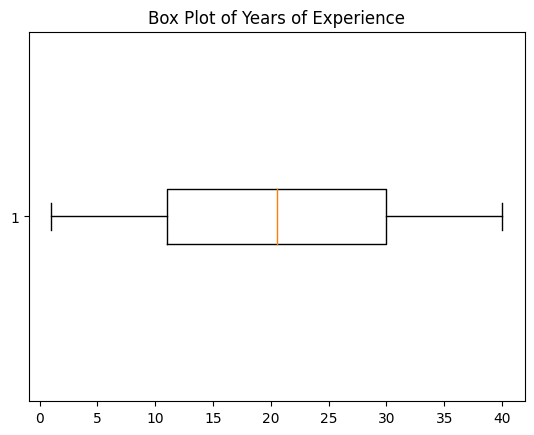


Outliers in 'YearsOfExperience':
Empty DataFrame
Columns: [EmployeeID, Age, YearsOfExperience, Gender, PerformanceRating]
Index: []


In [5]:
# Step 5: Outlier Detection
# Visualizing outliers in 'YearsOfExperience' using a box plot
plt.boxplot(df['YearsOfExperience'], vert=False)
plt.title('Box Plot of Years of Experience')
plt.show()

# Identifying outliers: Let's assume values greater than 40 are outliers (as per the problem statement)
outliers = df[df['YearsOfExperience'] > 40]
print("\nOutliers in 'YearsOfExperience':")
print(outliers)

# Handling outliers: Cap values greater than 40 to 40
df['YearsOfExperience'] = np.where(df['YearsOfExperience'] > 40, 40, df['YearsOfExperience'])


**Feature Scaling**

In [6]:
# Step 6: Feature Scaling (Standardization using z-score normalization)
scaler = StandardScaler()
df[['Age', 'YearsOfExperience']] = scaler.fit_transform(df[['Age', 'YearsOfExperience']])
print("\nAfter feature scaling 'Age' and 'YearsOfExperience':")
print(df.head())



After feature scaling 'Age' and 'YearsOfExperience':
   EmployeeID       Age  YearsOfExperience  Gender  PerformanceRating
0           1  1.622911          -0.395218       0                  5
1           2  0.743126           0.572405       1                  5
2           3 -0.488574          -1.098943       1                  2
3           4 -1.104424           0.396473       1                  4
4           5  0.039297          -0.307252       1                  1


**Data Visualization**

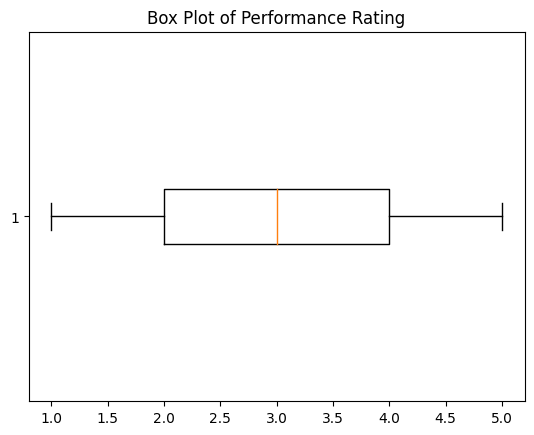

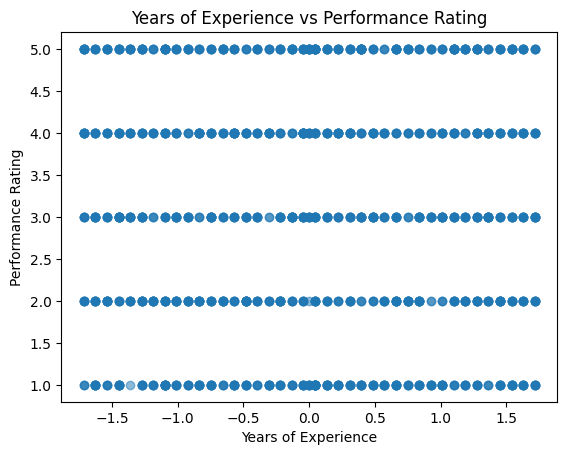

In [7]:
# Step 7: Data Visualization
# Box plot for Performance Rating
plt.boxplot(df['PerformanceRating'], vert=False)
plt.title('Box Plot of Performance Rating')
plt.show()

# Scatter plot between Years of Experience and Performance Rating
plt.scatter(df['YearsOfExperience'], df['PerformanceRating'], alpha=0.5)
plt.title('Years of Experience vs Performance Rating')
plt.xlabel('Years of Experience')
plt.ylabel('Performance Rating')
plt.show()


**Correlation Analysis**

In [8]:
# Step 8: Correlation Analysis
print("\nCorrelation Matrix:")
print(df[['Age', 'YearsOfExperience', 'PerformanceRating']].corr())



Correlation Matrix:
                        Age  YearsOfExperience  PerformanceRating
Age                1.000000          -0.000107           0.009473
YearsOfExperience -0.000107           1.000000          -0.003275
PerformanceRating  0.009473          -0.003275           1.000000


**Feature Engineering**

In [9]:
# Step 9: Feature Engineering (Creating 'Experience per Age')
df['ExperiencePerAge'] = df['YearsOfExperience'] / df['Age']
print("\nAfter creating 'ExperiencePerAge':")
print(df.head())



After creating 'ExperiencePerAge':
   EmployeeID       Age  YearsOfExperience  Gender  PerformanceRating  \
0           1  1.622911          -0.395218       0                  5   
1           2  0.743126           0.572405       1                  5   
2           3 -0.488574          -1.098943       1                  2   
3           4 -1.104424           0.396473       1                  4   
4           5  0.039297          -0.307252       1                  1   

   ExperiencePerAge  
0         -0.243524  
1          0.770266  
2          2.249285  
3         -0.358986  
4         -7.818692  


**Prepare Data for Modeling**

In [10]:
# Step 10: Prepare Data for Modeling
# Dropping irrelevant columns, like 'EmployeeID'
df = df.drop(columns=['EmployeeID'])

# Splitting the data into training and testing sets
X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)



Shape of training data: (1200, 4)
Shape of testing data: (300, 4)
